In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [4]:
import paper_viz as homomul_viz
from multisoc.generate.multidimensional_network import multidimensional_network_fix_av_degree
from multisoc.generate.two_dimensional_population import consol_comp_pop_frac_tnsr
from multisoc.metrics.network_statistics import comp_inter_group_ties
from multisoc.theory.network_statistics import ER_inter_group_links_theor

# Figure 3

## Figure 3a-c TOP

#### Generate network

In [5]:
h_mtrx_lst = [ np.array([[0.85,0.15],[0.15,0.85]]), np.array([[0.85,0.15],[0.15,0.85]]) ] ## List of 1d homophily matrices
pop_fracs_lst = [[0.5,0.5],[0.5,0.5]] ## The marginals of the population distribution defined by comp_pop_frac_tnsr
consol = 0.5
comp_pop_frac_tnsr = consol_comp_pop_frac_tnsr(pop_fracs_lst,consol)

N = 200

##################################
## Different versions

## Fig 3a
kind = "all"

## Fig 3b
# kind = "one"
p_d = [0.5, 0.5]

## Fig 3c
# kind = "any"
###################################

G = multidimensional_network_fix_av_degree(
                h_mtrx_lst,
                comp_pop_frac_tnsr,
                kind,
                directed=False,
                pop_fracs_lst = pop_fracs_lst,
                N=N,
                m=20,
                v = 0,
                p_d = p_d
                )

#### Visualize network

In [6]:
G.remove_nodes_from(list(nx.isolates(G)))
pos = nx.kamada_kawai_layout(G,scale=3)

In [7]:
color_dict = {
    (0,0):"#84e8af",
    (0,1):"#c0cdf9",
    (1,0):"#f0cd6f",
    (1,1):"#ffabb0"
    }
nodelist = G.nodes()
node_colors = [color_dict[G.nodes[i]["attr"]] for i in nodelist]
n = len(G.nodes())
node_size = 40000*(1/(n+200))

C:\Users\csh_samu\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:304: UserWarning: 

The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


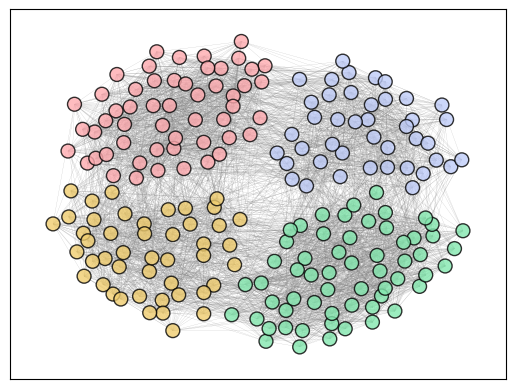

In [8]:
nx.draw_networkx(G,
                     with_labels = False,
                     pos=pos,
                     nodelist=nodelist,
                     node_color=node_colors,
                     node_size=node_size,
                     # node_shape=shape_dict[key],
                     width=0.1,
                     alpha = .8,
                     arrowstyle = '-|>',
                     linewidths = 1,
                     edgecolors = 'black',
                     edge_color = 'grey', ## v2
                     # ax=ax
                )

## Figure 3a-c BOTTOM

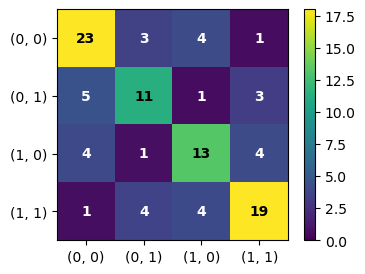

In [9]:
## Empirical values computed from the network

M_emp,_ = comp_inter_group_ties(G,comp_pop_frac_tnsr)
homomul_viz.fig_colored_matrix(
	100*M_emp/np.sum(M_emp),
	ax=None,
	xticks=[(0,0),(0,1),(1,0),(1,1)],
	yticks=[(0,0),(0,1),(1,0),(1,1)],
	show_colorbar=True,
	figsize=None,
	vmin=0,
	vmax=18
	)
plt.show()

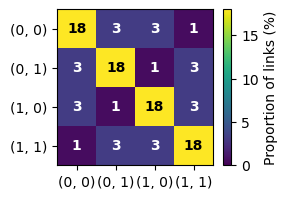

In [10]:
## Theoretical values (shown in the paper) - in very good agreement
M_theor, H_theor = ER_inter_group_links_theor(
    h_mtrx_lst,
    comp_pop_frac_tnsr,
    kind,
    p_d = p_d,
    alpha = None
    )

homomul_viz.fig_colored_matrix(
	M_theor*100,
	ax=None,
	xticks=[(0,0),(0,1),(1,0),(1,1)],
	yticks=[(0,0),(0,1),(1,0),(1,1)],
	show_colorbar=True,
	figsize=(2.7,2.7*3.0/4.0),
	vmin=0,
	vmax=18,
	)

## Get the current axis 
ax = plt.gca()        
## Get the images on an axis
im = ax.images        
## Assume colorbar was plotted last one plotted last
cb = im[-1].colorbar
## Change label
cb.set_label("Proportion of links (%)")

plt.show()

## Figure 3d

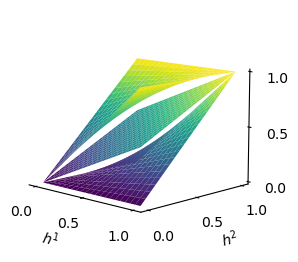

In [11]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(6*.7,4.5*.7))
ax.set_proj_type('persp')
ax.view_init(elev=11, azim=-46)

# Make data.
X = np.arange(0, 1.001, 0.05)
Y = np.arange(0, 1.001, 0.05)
X, Y = np.meshgrid(X, Y)


# Plot the surface.
Z = X*Y
surf1 = ax.plot_surface(X, Y, Z,
                       cmap="viridis",
#                         color="C0",
#                         alpha=0.8,
                       linewidth=2, antialiased=True,
                      )

Z = 0.5*X+0.5*Y
surf2 = ax.plot_surface(X, Y, Z,
                       cmap="viridis",
#                         color="C1",
#                         alpha=0.8,
                       linewidth=2, antialiased=True
                      )
Z = 1-(1-X)*(1-Y)
surf3 = ax.plot_surface(X, Y, Z,
                       cmap="viridis",
#                         color="C2",
#                         alpha=0.8,
                       linewidth=2, antialiased=True
                       )


## Transparent background
# make the panes transparent
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# make the grid lines transparent
ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

## Axes labels
ax.set_xlabel(r"$h^1$")
ax.set_ylabel(r"$h^2$")
ax.set_zlabel(r"$H$")
# ax.set_zlabel(r"$H=\mathcal{H}(h^1,h^2)$")

ax.set_xticks([0,0.5,1])
ax.set_yticks([0,0.5,1])
ax.set_zticks([0,0.5,1])
# ax.tick_params(axis="x",direction="in")

plt.show()